# DATA ANALYSIS ON TITANIC DATASET

## IMPORTING LIBRARIES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## DATA PROCESSING

In [6]:
df=pd.read_csv(r"E:\MachineLearningSessions\data\train.csv")

In [7]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
df.shape

(891, 12)

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [14]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [15]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### FINDING RELATION BETWEEN TARGET COLUMN AND OTHER FEATURES

In [16]:
df[['Pclass','Survived']].groupby('Pclass',as_index=False).mean()

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

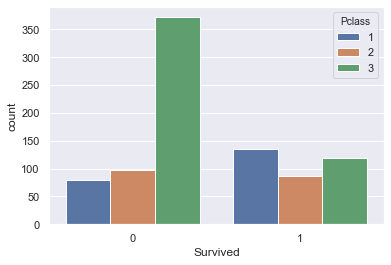

In [17]:
sns.countplot(x="Survived", hue="Pclass", data=df)

In [18]:
df[['Sex','Survived']].groupby('Sex',as_index=False).mean()

Sex  Survived
0  female  0.742038
1    male  0.188908

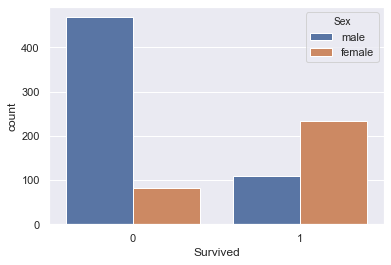

In [19]:
sns.countplot(x="Survived", hue="Sex", data=df)

In [20]:
df[['SibSp','Survived']].groupby('SibSp',as_index=False).mean()

SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

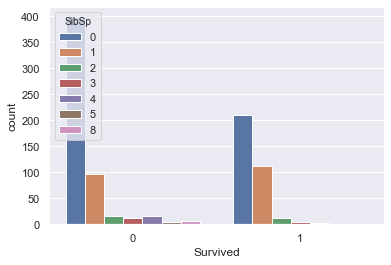

In [21]:
sns.countplot(x="Survived", hue="SibSp", data=df)

In [22]:
df[['Parch','Survived']].groupby('Parch',as_index=False).mean()

Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000

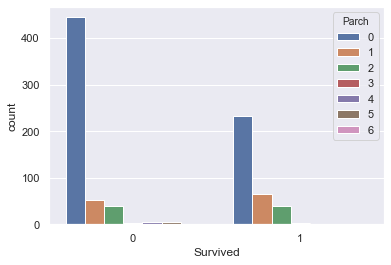

In [23]:
sns.countplot(x="Survived", hue="Parch", data=df)

In [24]:
df[['Embarked','Survived']].groupby('Embarked',as_index=False).mean()

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957

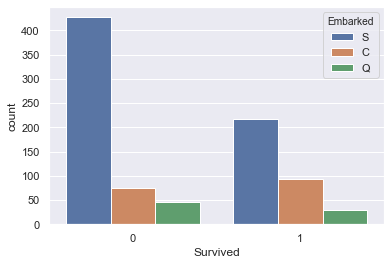

In [25]:
sns.countplot(x="Survived", hue="Embarked", data=df)

In [26]:
df.Age.agg(['max','min','mean','median'])

max       80.000000
min        0.420000
mean      29.699118
median    28.000000
Name: Age, dtype: float64

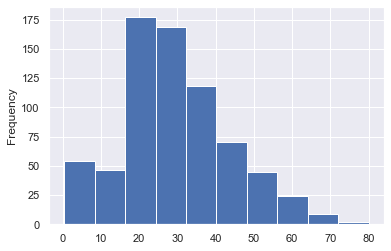

In [27]:
df["Age"].plot.hist()

In [28]:
df.Fare.agg(['max','min','mean','median'])

max       512.329200
min         0.000000
mean       32.204208
median     14.454200
Name: Fare, dtype: float64

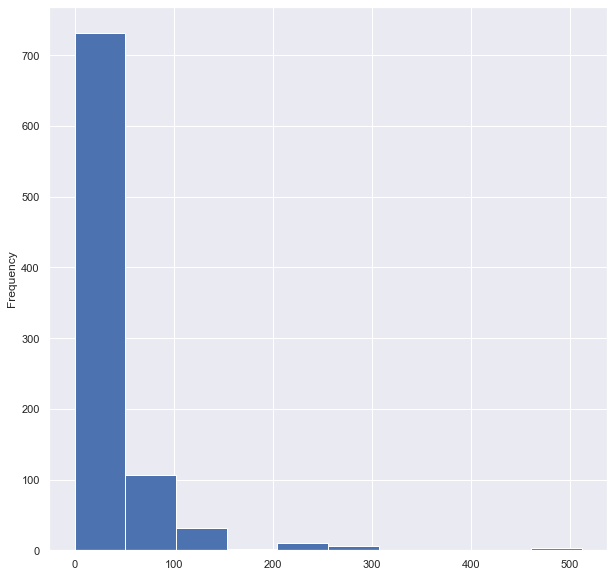

In [29]:
df["Fare"].plot.hist(figsize=(10,10))

### EXTRACTING USEFUL FEATURES FOR DATA PREPARATION

In [30]:
df1 = df[['Pclass','Sex','Age','Fare','Embarked']]

In [31]:
df1.head()

Pclass     Sex   Age     Fare Embarked
0       3    male  22.0   7.2500        S
1       1  female  38.0  71.2833        C
2       3  female  26.0   7.9250        S
3       1  female  35.0  53.1000        S
4       3    male  35.0   8.0500        S

### REPLACING NULL VALUES

In [32]:
df1.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [33]:
df1.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
df.Age.agg(['max','min','mean','median'])

max       80.000000
min        0.420000
mean      29.699118
median    28.000000
Name: Age, dtype: float64

In [52]:
df1.fillna({'Age':df1.Age.mean(),'Embarked':'S'},inplace=True)

In [53]:
df1.head()

Pclass     Sex   Age     Fare Embarked
0       3    male  22.0   7.2500        S
1       1  female  38.0  71.2833        C
2       3  female  26.0   7.9250        S
3       1  female  35.0  53.1000        S
4       3    male  35.0   8.0500        S

### ENCODING STRING VALUES INTO INTEGER VALUES

In [54]:
df2 = pd.get_dummies(df1[['Sex','Embarked']])

In [55]:
df2.head()

Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S
0           0         1           0           0           1
1           1         0           1           0           0
2           1         0           0           0           1
3           1         0           0           0           1
4           0         1           0           0           1

In [56]:
df3 = df1.select_dtypes(exclude=['object'])    
df3.head()

Pclass   Age     Fare
0       3  22.0   7.2500
1       1  38.0  71.2833
2       3  26.0   7.9250
3       1  35.0  53.1000
4       3  35.0   8.0500

### FINAL DATASET CONTAINING ALL THE FEATURES USED FOR PREDICTING OUTPUT

In [57]:
final_data = pd.concat((df2,df3),axis=1)

In [58]:
final_data.head()

Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  Pclass   Age  \
0           0         1           0           0           1       3  22.0   
1           1         0           1           0           0       1  38.0   
2           1         0           0           0           1       3  26.0   
3           1         0           0           0           1       1  35.0   
4           0         1           0           0           1       3  35.0   

      Fare  
0   7.2500  
1  71.2833  
2   7.9250  
3  53.1000  
4   8.0500

In [59]:
final_data.isnull().sum()

Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Pclass        0
Age           0
Fare          0
dtype: int64

In [60]:
final_data.shape

(891, 8)

### EXTRACTING INPUT AND OUTPUT DATA IN X AND Y

In [61]:
X=final_data.values
y=df.Survived.values
print(X)
print(y)

[[ 0.      1.      0.     ...  3.     22.      7.25  ]
 [ 1.      0.      1.     ...  1.     38.     71.2833]
 [ 1.      0.      0.     ...  3.     26.      7.925 ]
 ...
 [ 1.      0.      0.     ...  3.     28.     23.45  ]
 [ 0.      1.      1.     ...  1.     26.     30.    ]
 [ 0.      1.      0.     ...  3.     32.      7.75  ]]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1

### SPLITTING THE DATA IN TRAIN AND TEST(80:20) AND SCALLING THE DATA

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1)

In [63]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## LOGISTIC REGRESSION

In [64]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)
y_pred=log.predict(X_test)

from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_pred)
print(cm1)
from sklearn.metrics import accuracy_score
acc1=accuracy_score(y_test,y_pred)
print(acc1)

[[88 18]
 [23 50]]
0.770949720670391


C:\Users\manish\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## RANDOM FOREST CLASSIFICATION

In [68]:
from sklearn.ensemble import RandomForestClassifier
randomClassifier=RandomForestClassifier(n_estimators=200,random_state=0)
randomClassifier.fit(X_train,y_train)
y_pred_random=randomClassifier.predict(X_test)                                      

from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test,y_pred_random)
print(cm2)
from sklearn.metrics import accuracy_score
acc2=accuracy_score(y_test,y_pred_random)
print(acc2)

[[96 10]
 [26 47]]
0.7988826815642458


## SUPPORT VECTOR CLASSIFICATION

In [66]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train,y_train)
y_pred_svc=classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test,y_pred_svc)
print(cm3)
from sklearn.metrics import accuracy_score
acc3=accuracy_score(y_test,y_pred_svc)
print(acc3)

[[100   6]
 [ 34  39]]
0.776536312849162


## COMPARISON AMONG THE ACCURACY OBTAINED BY THREE MODELS

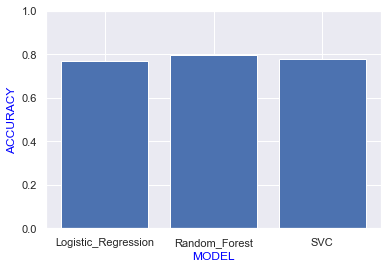

In [71]:
xax=["Logistic_Regression","Random_Forest","SVC"]
yax=[acc1,acc2,acc3]
plt.bar(xax,yax)
plt.ylim(0,1)
plt.xlabel("MODEL",color="blue",size=12)
plt.ylabel("ACCURACY",color="blue",size=12)
plt.show()